# Modeling

In [1]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# modeling
from sklearn.cluster import KMeans
import sklearn.preprocessing

# statistics testing
import scipy.stats as stats

# system manipulation
import itertools
import os
import sys
sys.path.append("./util_")
import prepare_
import explore_

# other
import math
import pydataset
import env
import warnings
warnings.filterwarnings("ignore")

# set the random seed
np.random.seed(95)

In [2]:
iris = pydataset.data("iris")
iris_copy = iris.copy()
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


**specify features**

In [3]:
x_features = iris[["Sepal.Width", "Petal.Width"]]

**Visualize**

<Axes: xlabel='Sepal.Width', ylabel='Petal.Width'>

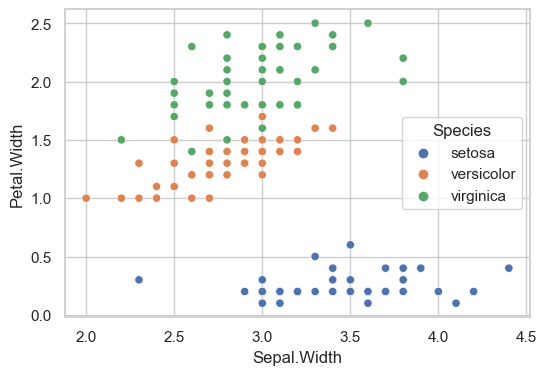

In [4]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=iris, x="Sepal.Width", y="Petal.Width", hue="Species")

**Create, fit and predict**

In [5]:
# set the max number ok of k to loop through
# 5% of the data
iter = math.ceil(len(iris) * 0.05)

model_centers = []
model_inertia = []

for k in range(1,iter + 1):
    # ceate model object
    kmean = KMeans(n_clusters= k)

    # fit model object
    kmean.fit(x_features)

    # make predictions
    label = kmean.predict(x_features)
    
    # add predictions to the original dataframe
    iris[f"clusters_{k}"] = label

    # view ceters
    model_centers.append(kmean.cluster_centers_)
    
    model_inertia.append(kmean.inertia_)


In [6]:
iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,clusters_1,clusters_2,clusters_3,clusters_4,clusters_5,clusters_6,clusters_7,clusters_8
1,5.1,3.5,1.4,0.2,setosa,0,1,0,1,2,0,5,1
2,4.9,3.0,1.4,0.2,setosa,0,1,0,1,2,0,0,6
3,4.7,3.2,1.3,0.2,setosa,0,1,0,1,2,0,0,6


In [7]:
# numer of clusters in each model
iris.iloc[:,5:].nunique()

clusters_1    1
clusters_2    2
clusters_3    3
clusters_4    4
clusters_5    5
clusters_6    6
clusters_7    7
clusters_8    8
dtype: int64

**Visualize predictions**

Text(0.5, 1.0, 'Change in inertia as k increases')

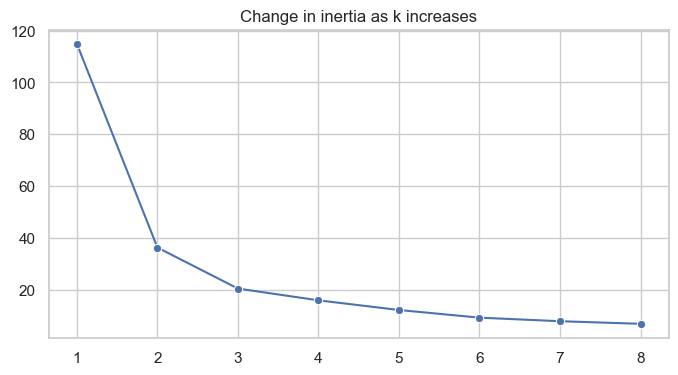

In [8]:
# plot the inartia for to chose the best k
plt.figure(figsize=(8, 4))
sns.lineplot(y = model_inertia, x=np.arange(1,9), marker="o")
plt.title("Change in inertia as k increases")

3 LOOKS TO HAVE BE THE BEST K

In [9]:
# creat a dataframe of the best model k
ceters = pd.DataFrame(model_centers[2], columns=x_features.columns)
ceters

,Sepal.Width,Petal.Width
0,3.451020,0.244898
1,3.041667,2.052083
2,2.707547,1.309434


Text(0.5, 1.0, 'Visualize cetroids')

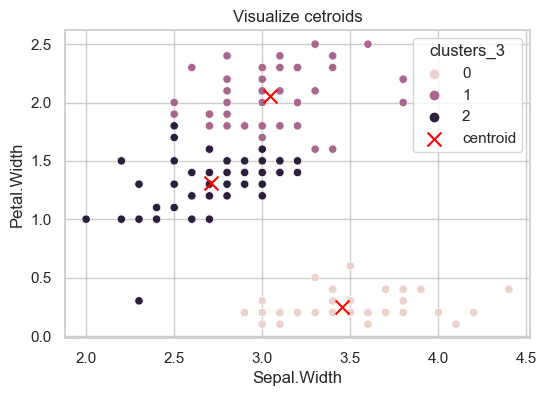

In [10]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=iris, x="Sepal.Width", y="Petal.Width", hue="clusters_3")
ceters.plot.scatter(x="Sepal.Width", y="Petal.Width", c='red', marker='x', s=100, label='centroid', ax=plt.gca())
plt.title("Visualize cetroids")


## Scaled

In [11]:
# build a scaling object
scaler = sklearn.preprocessing.MinMaxScaler()

# use min max scale on the x features
x_features_scaled = scaler.fit_transform(X=x_features)

# convert to dataframe
x_features_scaled = pd.DataFrame(x_features_scaled, columns= x_features.columns)
x_features_scaled.head()

,Sepal.Width,Petal.Width
0,0.625000,0.041667
1,0.416667,0.041667
2,0.500000,0.041667
3,0.458333,0.041667
4,0.666667,0.041667


**Creat, fit and predict**

In [12]:
# set the max number ok of k to loop through
# 5% of the data
iter = math.ceil(len(iris) * 0.05)

scaled_model_centers = []
scaled_model_inertia = []

for k in range(1,iter + 1):
    # ceate model object
    kmean = KMeans(n_clusters= k)

    # fit model object
    kmean.fit(x_features_scaled)

    # make predictions
    label = kmean.predict(x_features_scaled)
    
    # add predictions to the original dataframe
    iris_copy[f"clusters_{k}"] = label

    # view ceters
    scaled_model_centers.append(kmean.cluster_centers_)
    
    scaled_model_inertia.append(kmean.inertia_)


Text(0.5, 1.0, 'Change in inertia as k increases')

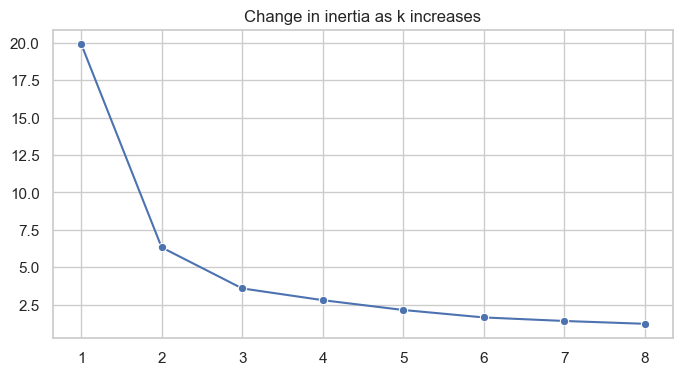

In [13]:
# plot the inartia for to chose the best k
plt.figure(figsize=(8, 4))
sns.lineplot(y=scaled_model_inertia, x=np.arange(1,9), marker="o")
plt.title("Change in inertia as k increases")

3 LOOKS TO HAVE BE THE BEST K

In [14]:
# creat a dataframe of the best model k
ceters = pd.DataFrame(model_centers[2], columns=x_features.columns)
ceters

,Sepal.Width,Petal.Width
0,3.451020,0.244898
1,3.041667,2.052083
2,2.707547,1.309434


Text(0.5, 1.0, 'Visualize cetroids')

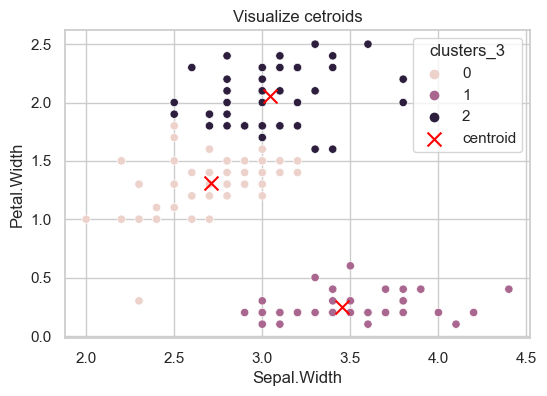

In [15]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=iris_copy, x="Sepal.Width", y="Petal.Width", hue="clusters_3")
ceters.plot.scatter(x="Sepal.Width", y="Petal.Width", c='red', marker='x', s=100, label='centroid', ax=plt.gca())
plt.title("Visualize cetroids")
